# Library

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Images

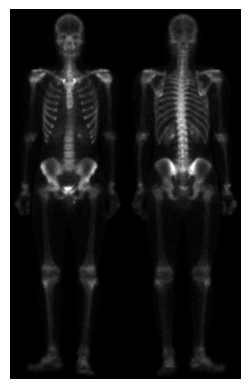

In [2]:
img1 = cv2.imread('skeleton_orig.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

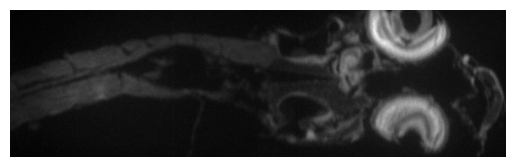

In [3]:
img2 = cv2.imread('fish.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

# Useful Functions

In [7]:
def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def show_results(img, laplacian_img, sharpened_img1, sobel_gradient_img, smooth_sobel_img, mask_img, sharpened_img2, power_law_trans_img):
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(laplacian_img, cmap='gray')
    plt.title('Laplacian Image')
    plt.axis('off')
    
    plt.show()
    
    plt.subplot(121)
    plt.imshow(sharpened_img1, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(sobel_gradient_img, cmap='gray')
    plt.title('Sobel Gradient Image')
    plt.axis('off')
    
    plt.show()
    
    plt.subplot(121)
    plt.imshow(smooth_sobel_img, cmap='gray')
    plt.title('Smoothed Sobel Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(mask_img, cmap='gray')
    plt.title('Mask Image')
    plt.axis('off')
    
    plt.show()
    
    plt.subplot(121)
    plt.imshow(sharpened_img2, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(power_law_trans_img, cmap='gray')
    plt.title('Power-law Trans Image')
    plt.axis('off')
    
    plt.show()

class 

def normalize_image(image):
    min_val = np.min(image)
    g_m = image - min_val
    
    g_s = 255 * (g_m / np.max(g_m))
    return g_s

## 1. Bone

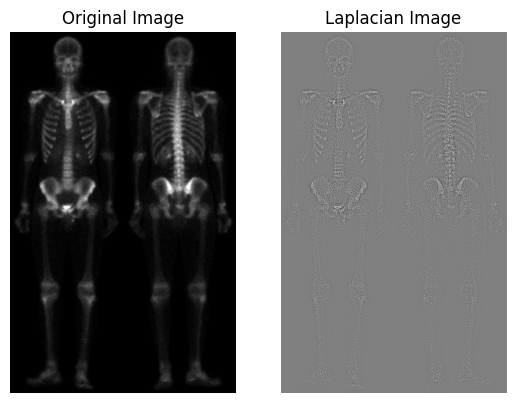

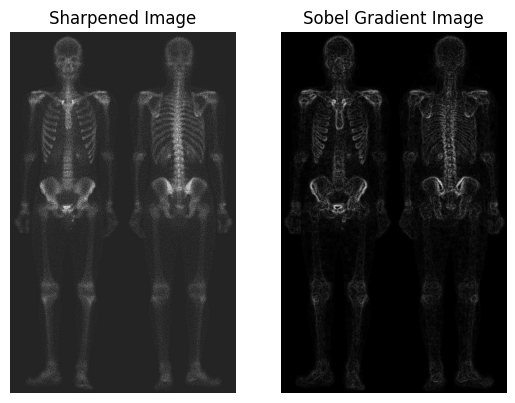

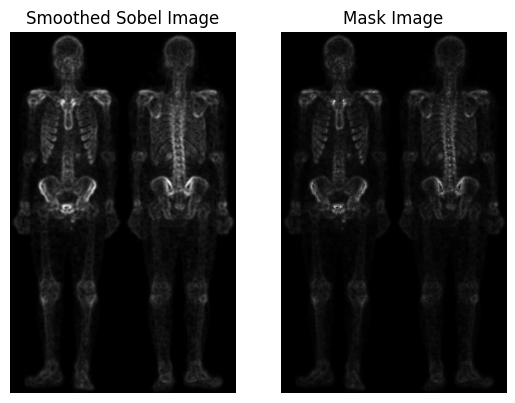

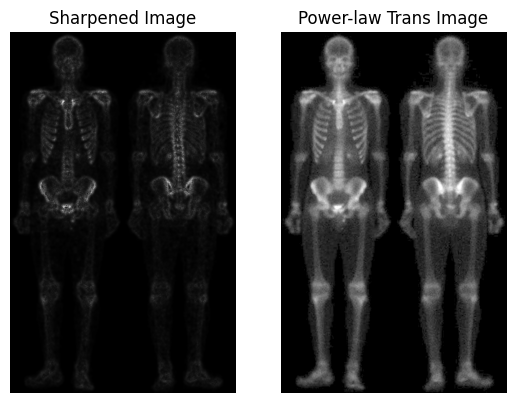

In [8]:
# (b)
laplacian_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
laplacian_img1 = cv2.filter2D(img1, cv2.CV_64F, laplacian_kernel)

# (c)
sharpened_by_laplacian_img1 = img1 + normalize_image(laplacian_img1)

# (d)
sobel_kernel_x = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

sobel_kernel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# 計算梯度
grad_x = cv2.filter2D(img1, cv2.CV_64F, sobel_kernel_x)
grad_y = cv2.filter2D(img1, cv2.CV_64F, sobel_kernel_y)

sobel_mag1 = np.absolute(grad_x) + np.absolute(grad_y)

# (e)
sobel_smoothed_img1 = cv2.blur(sobel_mag1, (5, 5))

# (f)
mask_img1 = normalize_image(laplacian_img1) * sobel_smoothed_img1

# (g)
sharpened_by_mask_img1 = img1 + mask_img1

# (h)
gamma, c = 0.5, 1
final_img1 = c * img1 ** gamma

# show the results
show_results(img1, laplacian_img1, sharpened_by_laplacian_img1, sobel_mag1, sobel_smoothed_img1, mask_img1, sharpened_by_mask_img1, final_img1)